In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [30]:
#dataset utilizado - "heart_2020_cleaned.csv"
df = pd.read_csv(r"heart_2020_cleaned.csv")
test = df.sample(10) #numero de valores a usar para prediccion
train = df[~df.isin(test)] #valores a usar para entrenamiento
train.dropna(inplace = True)

El tipo de problema que se resolverá es por clasificación, esto debido a que solo hay dos posibles salidas, 1 o 0 (binario)

In [3]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
print(train.describe())

                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  319785.000000   319785.000000  319785.000000  319785.000000
mean       28.325429        3.371800       3.898404       7.097103
std         6.356154        7.950954       7.955318       1.435997
min        12.020000        0.000000       0.000000       1.000000
25%        24.030000        0.000000       0.000000       6.000000
50%        27.340000        0.000000       0.000000       7.000000
75%        31.420000        2.000000       3.000000       8.000000
max        94.850000       30.000000      30.000000      24.000000


In [52]:
from sklearn import preprocessing #convertimos los Yes y No de HeartDisease en binario
label = preprocessing.LabelEncoder()

train['HeartDisease']= label.fit_transform(train['HeartDisease'])
test['HeartDisease']= label.fit_transform(test['HeartDisease'])
print(train['HeartDisease'].unique())

[0 1]


Convertimos todos nuestros valores para poder utilizarlos en el modelo

In [31]:
train['Smoking']= label.fit_transform(train['Smoking'])
test['Smoking']= label.fit_transform(test['Smoking'])
print(train['Smoking'].unique())

[1 0]


In [32]:
train['AlcoholDrinking']= label.fit_transform(train['AlcoholDrinking'])
test['AlcoholDrinking']= label.fit_transform(test['AlcoholDrinking'])
print(train['AlcoholDrinking'].unique())

[0 1]


In [33]:
train['Stroke']= label.fit_transform(train['Stroke'])
test['Stroke']= label.fit_transform(test['Stroke'])
print(train['Stroke'].unique())

[0 1]


In [34]:
train['DiffWalking']= label.fit_transform(train['DiffWalking'])
test['DiffWalking']= label.fit_transform(test['DiffWalking'])
print(train['DiffWalking'].unique())

[0 1]


In [35]:
train['Sex']= label.fit_transform(train['Sex'])
test['Sex']= label.fit_transform(test['Sex'])
print(train['Sex'].unique())

[0 1]


In [36]:
train['Race']= label.fit_transform(train['Race'])
test['Race']= label.fit_transform(test['Race'])
print(train['Race'].unique())

[5 2 1 0 4 3]


In [38]:
train['Diabetic']= label.fit_transform(train['Diabetic'])
test['Diabetic']= label.fit_transform(test['Diabetic'])
print(train['Diabetic'].unique())

[2 0 1 3]


In [39]:
train['AgeCategory']= label.fit_transform(train['AgeCategory'])
test['AgeCategory']= label.fit_transform(test['AgeCategory'])
print(train['AgeCategory'].unique())

[ 7 12  9 11  4 10  8  6  5  0  3  2  1]


In [40]:
train['PhysicalActivity']= label.fit_transform(train['PhysicalActivity'])
test['PhysicalActivity']= label.fit_transform(test['PhysicalActivity'])
print(train['PhysicalActivity'].unique())

[1 0]


In [41]:
train['GenHealth']= label.fit_transform(train['GenHealth'])
test['GenHealth']= label.fit_transform(test['GenHealth'])
print(train['GenHealth'].unique())

[4 1 2 3 0]


In [42]:
train['Asthma']= label.fit_transform(train['Asthma'])
test['Asthma']= label.fit_transform(test['Asthma'])
print(train['Asthma'].unique())

[1 0]


In [43]:
train['KidneyDisease']= label.fit_transform(train['KidneyDisease'])
test['KidneyDisease']= label.fit_transform(test['KidneyDisease'])
print(train['KidneyDisease'].unique())

[0 1]


In [44]:
train['SkinCancer']= label.fit_transform(train['SkinCancer'])
test['SkinCancer']= label.fit_transform(test['SkinCancer'])
print(train['SkinCancer'].unique())

[1 0]


In [23]:
train.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000
mean,0.085595,28.325429,0.412477,0.068096,0.037738,3.371800,3.898404,0.138875,0.475279,6.514536,4.396735,0.300383,0.775355,2.220911,7.097103,0.134056,0.036828,0.093244
std,0.279766,6.356154,0.492281,0.251911,0.190562,7.950954,7.955318,0.345816,0.499389,3.564772,1.212221,0.716477,0.417349,1.534646,1.435997,0.340713,0.188339,0.290774
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


<ipython-input-24-bd563711ee9d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train.drop(['HeartDisease'],1).hist()


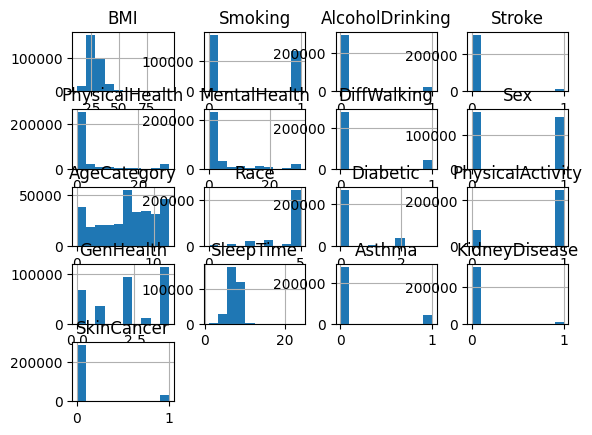

In [24]:
train.drop(['HeartDisease'],1).hist() #se muestra el dataset
plt.show()

In [25]:
X = np.array(train.drop(['HeartDisease'],1))
y = np.array(train['HeartDisease'])
X.shape

<ipython-input-25-e68f5b06cbe6>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(train.drop(['HeartDisease'],1))


(319785, 17)

In [26]:
model = linear_model.LogisticRegression() #modelo de regresion logistica
model.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
Y = np.array(test.drop(['HeartDisease'],1))
results = np.array(test['HeartDisease'])
Y.shape

<ipython-input-54-5649dccb1c56>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Y = np.array(test.drop(['HeartDisease'],1))


(10, 17)

In [56]:
predictions = model.predict(Y)
print(predictions)

[0 0 0 0 0 0 0 0 0 0]


In [58]:
print(test['HeartDisease'])

92451     0
206641    0
101198    0
286380    0
302685    0
141685    0
263203    0
116677    0
312312    0
70206     0
Name: HeartDisease, dtype: int64


In [57]:
model.score(Y, results)

1.0